<a href="https://colab.research.google.com/github/BanceSt/StageRN/blob/master/catsVsDogsSpectro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!unzip "/content/drive/My Drive/dataStage/audio-cats-and-dogs.zip" -d /content/sample_data

Archive:  /content/drive/My Drive/dataStage/audio-cats-and-dogs.zip
  inflating: /content/sample_data/cats_dogs/cat_1.wav  
  inflating: /content/sample_data/cats_dogs/cat_10.wav  
  inflating: /content/sample_data/cats_dogs/cat_100.wav  
  inflating: /content/sample_data/cats_dogs/cat_101.wav  
  inflating: /content/sample_data/cats_dogs/cat_102.wav  
  inflating: /content/sample_data/cats_dogs/cat_103.wav  
  inflating: /content/sample_data/cats_dogs/cat_105.wav  
  inflating: /content/sample_data/cats_dogs/cat_106.wav  
  inflating: /content/sample_data/cats_dogs/cat_107.wav  
  inflating: /content/sample_data/cats_dogs/cat_108.wav  
  inflating: /content/sample_data/cats_dogs/cat_109.wav  
  inflating: /content/sample_data/cats_dogs/cat_11.wav  
  inflating: /content/sample_data/cats_dogs/cat_110.wav  
  inflating: /content/sample_data/cats_dogs/cat_112.wav  
  inflating: /content/sample_data/cats_dogs/cat_113.wav  
  inflating: /content/sample_data/cats_dogs/cat_114.wav  
  inflat

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from matplotlib.image import imread
from tensorflow import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.io.wavfile as wavfile
import sklearn
import sklearn.metrics
import seaborn as sns
import random
import math
import sklearn.utils
import sklearn.metrics
import matplotlib.pyplot as plt
import glob
import os
import scipy
import scipy.signal
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
import IPython

print(tf.version.VERSION)


1.15.0


In [0]:
WAVE_FOLDER = '/content/sample_data/cats_dogs'
FRAMERATE = 16000
MAX_WAV_SAMPLES = 20*FRAMERATE
DOWNSAMPLING_SCALE = 1

df = pd.read_csv("/content/sample_data/train_test_split.csv")
test_cat = df[['test_cat']].dropna().rename(index=str, columns={"test_cat": "file"}).assign(label=0)
test_dog = df[['test_dog']].dropna().rename(index=str, columns={"test_dog": "file"}).assign(label=1)
train_cat = df[['train_cat']].dropna().rename(index=str, columns={"train_cat": "file"}).assign(label=0)
train_dog = df[['train_dog']].dropna().rename(index=str, columns={"train_dog": "file"}).assign(label=1)

test_df = pd.concat([test_cat, test_dog]).reset_index(drop=True)
train_df = pd.concat([train_cat, train_dog]).reset_index(drop=True)

**Fonction pour créer un spectrogramme, avec exemple :**


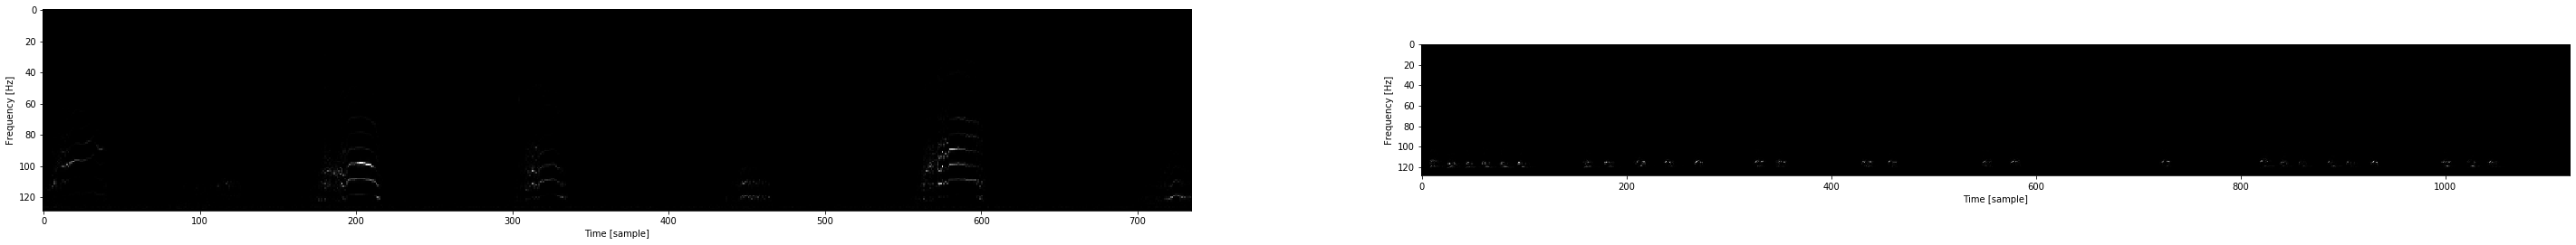

In [8]:
def plot_spectrogram(file):
    x = wavfile.read(file)[1]
    f, t, Sxx = scipy.signal.spectrogram(x)
    #plt.pcolormesh(t, f, Sxx)
    plt.imshow(np.flip(Sxx, axis=0),cmap='gray')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sample]')


plt.figure(figsize=(50,50))
for i in range(0,2,2):
    plt.subplot(5,2,i+1)
    plot_spectrogram(os.path.join(WAVE_FOLDER, test_cat.iloc[i]['file']))
    plt.subplot(5,2,i+2)
    plot_spectrogram(os.path.join(WAVE_FOLDER, test_dog.iloc[i]['file']))

**Fonction pour sauvegarder les spectres, de tous un dossier de son :**

In [0]:
def save_all_spectro(base ,path) :
  fig = plt.figure()
  for i in range(len(base)) :
    img = base.iloc[i]["file"][:-3] + "png"
    plt.axis("off")
    plot_spectrogram(os.path.join("/content/sample_data/cats_dogs", base.iloc[i]["file"]))
    fig.savefig(path + img,bbox_inches='tight',transparent=True, pad_inches=0)
    plt.clf()

**Création des fichiers contenant les spectres :**

In [0]:
try :
  os.makedirs("/content/sample_data/cats_dogs_spec")
  os.makedirs("/content/sample_data/cats_dogs_spec/test")
  os.makedirs("/content/sample_data/cats_dogs_spec/test/cats")
  os.makedirs("/content/sample_data/cats_dogs_spec/test/dogs")
  os.makedirs("/content/sample_data/cats_dogs_spec/train/cats")
  os.makedirs("/content/sample_data/cats_dogs_spec/train/dogs")
except OSError:
  pass 

**Sauvegarde des spectres :**

In [52]:
save_all_spectro(train_cat, "/content/sample_data/cats_dogs_spec/train/cats/")
save_all_spectro(train_dog, "/content/sample_data/cats_dogs_spec/train/dogs/")
save_all_spectro(test_cat, "/content/sample_data/cats_dogs_spec/test/cats/")
save_all_spectro(test_dog, "/content/sample_data/cats_dogs_spec/test/dogs/")

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

**Partie qui servira à equilibre le nombre de cris de chats et de chiens, puis les spectrogrammes**

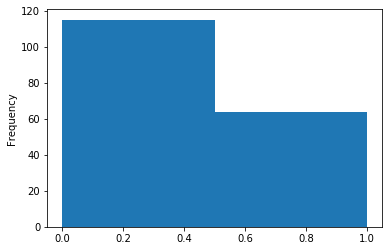

In [12]:
#Histogramme du nombre de cris par type d'animaux (chat, chien)
train_df['label'].plot.hist(bins=2)

In [14]:
#Equilibrage des nombres de cris dans train_files, train_labels
random_oversampler = RandomOverSampler()
idx = np.arange(0, len(train_df)).reshape(-1, 1)
idx_sampled, _ = random_oversampler.fit_sample(idx, train_df['label'])
train_files, train_labels = train_df.iloc[idx_sampled.flatten()]['file'].values, train_df.iloc[idx_sampled.flatten()]['label'].values
train_files, train_labels = sklearn.utils.shuffle(train_files, train_labels)
test_files, test_labels = test_df['file'].values, test_df['label'].values



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


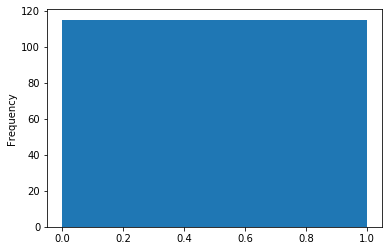

In [15]:
#Historigramme après équilibrage
pd.Series(train_labels).plot.hist(bins=2);

In [0]:
train_files_spec = []
test_files_spec = []
for i in range(len(train_files)) :
  train_files_spec.append(train_files[i].replace("wav","png"))
for i in range(len(test_files)) :
  test_files_spec.append(test_files[i].replace("wav","png"))


 **Transformation des images en matrice :**

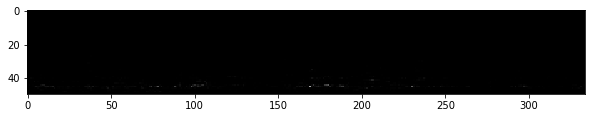

In [17]:
img = imread("/content/sample_data/cats_dogs_spec/train/cats/" + train_files_spec[1])
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [0]:
for i in range(len(train_files_spec)) :
  if "dog" in train_files_spec[i] :
    train_files_spec[i] = imread("/content/sample_data/cats_dogs_spec/train/dogs/" + train_files_spec[i])
  else :
    train_files_spec[i] = imread("/content/sample_data/cats_dogs_spec/train/cats/" + train_files_spec[i])

  

for i in range(len(test_files_spec)) :
  if "cat" in test_files_spec[i] :
    test_files_spec[i] = imread("/content/sample_data/cats_dogs_spec/test/cats/" + test_files_spec[i])
  else :
    test_files_spec[i] = imread("/content/sample_data/cats_dogs_spec/test/dogs/" + test_files_spec[i])

In [19]:
train_files_spec = np.asarray(train_files_spec)
print(train_files_spec.shape)
test_files_spec = np.asarray(test_files_spec)
print(test_files_spec.shape)
train_files_spec = train_files_spec/255.0
test_files_spec = test_files_spec/255.0


(230,)
(98,)


**Mise en place des points de sauvegarde :**

In [20]:
checkpoint_path = "/content/drive/My Drive/savemodel/Model15chkSpec/cp-{epoch:04d}"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

print(checkpoint_dir)

/content/drive/My Drive/savemodel/Model15chkSpec


**Création du Model :**

In [0]:
batch_size = 20
epochs = 100
IMG_HEIGHT = 50
IMG_WIDTH = 334
total_train = 179
total_val = 98

In [0]:
def create_model_spec() :
  model = Sequential([
    Conv2D(8, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,1)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(8, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(8, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
  return model

model = create_model_spec()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 334, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 167, 16)       0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 167, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 167, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 83, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 83, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 41, 64)         0

**Générateur pour le modele :**

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [47]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory="/content/sample_data/cats_dogs_spec/train",
                                                           shuffle=True,
                                                           color_mode ="grayscale",
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')



Found 179 images belonging to 2 classes.


In [48]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory="/content/sample_data/cats_dogs_spec/test",
                                                              color_mode ="grayscale",
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 98 images belonging to 2 classes.


In [75]:
print(val_data_gen.labels)
print(val_data_gen.class_indices)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
{'cats': 0, 'dogs': 1}


20

**Apprentissage et validation :**

In [54]:
model.save_weights(checkpoint_path.format(epoch=0))
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    callbacks = [cp_callback],
    class_weight ={0:1,1:2}
)

Epoch 1/100
1/8 [==>...........................] - ETA: 1s - loss: 0.6785 - acc: 0.7000
Epoch 00001: saving model to /content/drive/My Drive/savemodel/Model15chkSpec/cp-0001
8/8 [==============================] - 1s 163ms/step - loss: 0.9367 - acc: 0.6478 - val_loss: 0.6816 - val_acc: 0.5750
Epoch 2/100
1/8 [==>...........................] - ETA: 1s - loss: 0.6491 - acc: 0.7500
Epoch 00002: saving model to /content/drive/My Drive/savemodel/Model15chkSpec/cp-0002
8/8 [==============================] - 1s 140ms/step - loss: 0.8993 - acc: 0.5220 - val_loss: 0.6598 - val_acc: 0.5875
Epoch 3/100
1/8 [==>...........................] - ETA: 2s - loss: 0.6246 - acc: 0.6500
Epoch 00003: saving model to /content/drive/My Drive/savemodel/Model15chkSpec/cp-0003
8/8 [==============================] - 1s 134ms/step - loss: 0.8245 - acc: 0.6750 - val_loss: 0.6118 - val_acc: 0.7500
Epoch 4/100
1/8 [==>...........................] - ETA: 2s - loss: 0.5637 - acc: 0.6000
Epoch 00004: saving model to /con

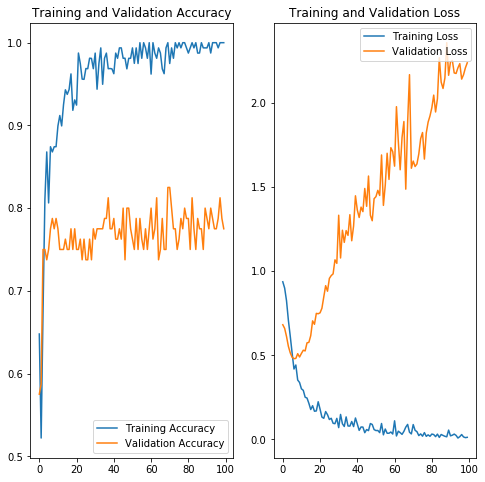

In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
49
0.5


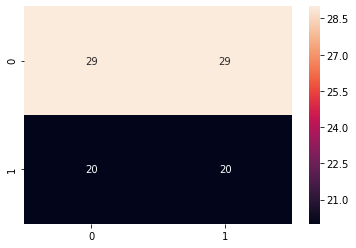

In [66]:
#Matrice de confusion
def matrice_confusion(modele) :
  predicted_probs = modele.predict_generator(val_data_gen,)
  #steps=total_val // batch_size)
  predicted_classes = np.round(predicted_probs)
  predicted_classes = predicted_classes.reshape(predicted_classes.size)

  print(val_data_gen.labels)
  print(np.count_nonzero(test_labels == 1))
  print(sklearn.metrics.accuracy_score(predicted_classes, val_data_gen.labels))
  sns.heatmap(sklearn.metrics.confusion_matrix(predicted_classes, val_data_gen.labels), annot=True)
matrice_confusion(model)

In [0]:
model1 = create_model_spec()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
49
98
0.5408163265306123


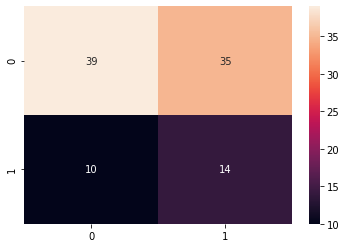

In [43]:
model1.load_weights(checkpoint_path.format(epoch=6))
matrice_confusion(model1)

In [0]:

# test sur un wav particulier
aFile = "/content/sample_data/cats_dogs/test/cats/cat_110.wav"

wave_raw = wavfile.read(aFile)[1]
wave_raw = wave_raw/np.std(wave_raw)
length = len(wave_raw)
left = 0
right = MAX_WAV_SAMPLES - left - length
wave = np.pad(wave_raw, pad_width=((left, right)), mode='wrap')



In [0]:
wave = wave.reshape( (1,wave.size) )
print(wave.shape)

resu = model.predict(wave)
print(resu)

(1, 320000)
[[0.50153714 0.4984629 ]]


In [0]:
# test sur un wav particulier
files = ["/content/sample_data/cats_dogs/test/cats/cat_110.wav","/content/sample_data/cats_dogs/train/dog/dog_barking_10.wav"]

waves = []
for aFile in files:
  
  wave_raw = wavfile.read(aFile)[1]
  wave_raw = wave_raw/np.std(wave_raw)
  length = len(wave_raw)
  left = 0
  right = MAX_WAV_SAMPLES - left - length
  wave = np.pad(wave_raw, pad_width=((left, right)), mode='wrap')
  wave = wave.reshape( (1,wave.size) )
  print(wave.shape)

  if len(waves) == 0 :
    waves = wave
  else :
    waves = np.concatenate((waves, wave), axis = 0)


(1, 320000)
(1, 320000)


In [0]:
print(waves.shape)

(2, 320000)


In [0]:
resu = model.predict(waves)
print(resu)

[[0.50153714 0.4984629 ]
 [0.50484157 0.49515846]]


In [0]:
valeur = "/content/drive/My Drive/savemodel/Model15chk"
!ls "$valeur"


checkpoint		     cp-0008.data-00001-of-00002
cp-0001.data-00000-of-00002  cp-0008.index
cp-0001.data-00001-of-00002  cp-0009.data-00000-of-00002
cp-0001.index		     cp-0009.data-00001-of-00002
cp-0002.data-00000-of-00002  cp-0009.index
cp-0002.data-00001-of-00002  cp-0010.data-00000-of-00002
cp-0002.index		     cp-0010.data-00001-of-00002
cp-0003.data-00000-of-00002  cp-0010.index
cp-0003.data-00001-of-00002  cp-0011.data-00000-of-00002
cp-0003.index		     cp-0011.data-00001-of-00002
cp-0004.data-00000-of-00002  cp-0011.index
cp-0004.data-00001-of-00002  cp-0012.data-00000-of-00002
cp-0004.index		     cp-0012.data-00001-of-00002
cp-0005.data-00000-of-00002  cp-0012.index
cp-0005.data-00001-of-00002  cp-0013.data-00000-of-00002
cp-0005.index		     cp-0013.data-00001-of-00002
cp-0006.data-00000-of-00002  cp-0013.index
cp-0006.data-00001-of-00002  cp-0014.data-00000-of-00002
cp-0006.index		     cp-0014.data-00001-of-00002
cp-0007.data-00000-of-00002  cp-0014.index
cp-0007.data-00001-of-00

In [0]:
chaine="toto"
!echo "truc$chaine"

tructoto


In [76]:
model1 = create_model_spec()
model1.load_weights(checkpoint_path.format(epoch=10))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
49
98
0.47959183673469385


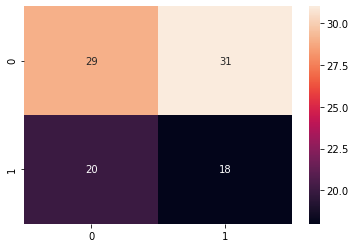

In [77]:
#Matrice de confusion
matrice_confusion(model1)